## Artificial Neural Network

#### Part 1 - Data Preprocessing

In [59]:
# Import the library 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
# loading dataset 

dataset = pd.read_csv("Churn_Modelling.csv")

In [61]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [62]:
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:,13]

In [63]:
# Create dummy variable for categorical feature

geography = pd.get_dummies(X["Geography"],drop_first=True)
gender = pd.get_dummies(X["Gender"],drop_first=True)

In [64]:
# mearging created dummy column to our feature dataframe x

X = pd.concat([X,geography,gender], axis=1)

In [65]:
# drop unwanted column 

X = X.drop(["Geography","Gender"],axis=1)

In [66]:
# importing train test split library
from sklearn.model_selection import train_test_split

In [67]:
# spliting the dataset into their traning set and test set

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [68]:
# import feature scalling library

from sklearn.preprocessing import StandardScaler

In [69]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

#### Part 2 - Make ANN 

In [84]:
import keras
from keras.models import Sequential
from keras.layers import Dense
# from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout

In [85]:
# initialising the ANN

classifier = Sequential()

In [86]:
# Adding the input and first hidden layer
classifier.add(Dense(units=10, kernel_initializer='he_uniform', activation='relu', input_dim=11))
# Adding dropout layesrs 
classifier.add(Dropout(0.3))

In [87]:
# Adding the input and first hidden layer
classifier.add(Dense(units=20, kernel_initializer='he_uniform', activation='relu', input_dim=11))
# Adding dropout layesrs 
classifier.add(Dropout(0.4))

In [88]:
# Adding the input and first hidden layer
classifier.add(Dense(units=15, kernel_initializer='he_uniform', activation='relu', input_dim=11))
# Adding dropout layesrs 
classifier.add(Dropout(0.2))

In [89]:
# Adding the input and first hidden layer
classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

In [90]:
classifier.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [91]:
# fitting the ANN to the traning set 

model_history = classifier.fit(x_train, y_train, validation_split=0.33, batch_size=10, epochs=100)


Epoch 1/100
536/536 [==============================] - 2s 2ms/step - loss: 0.6971 - accuracy: 0.6902 - val_loss: 0.4904 - val_accuracy: 0.8005
Epoch 2/100
536/536 [==============================] - 1s 3ms/step - loss: 0.5418 - accuracy: 0.7770 - val_loss: 0.4840 - val_accuracy: 0.8008
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5155 - accuracy: 0.7871 - val_loss: 0.4695 - val_accuracy: 0.8008
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5050 - accuracy: 0.7869 - val_loss: 0.4698 - val_accuracy: 0.8008
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4829 - accuracy: 0.7908 - val_loss: 0.4513 - val_accuracy: 0.8069
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4835 - accuracy: 0.7875 - val_loss: 0.4435 - val_accuracy: 0.8008
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4712 - accuracy: 0.7893 - val_loss: 0.4441 - val_accuracy: 0.8069

Epoch 58/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3811 - accuracy: 0.8350 - val_loss: 0.3412 - val_accuracy: 0.8580
Epoch 59/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3811 - accuracy: 0.8347 - val_loss: 0.3425 - val_accuracy: 0.8595
Epoch 60/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3722 - accuracy: 0.8403 - val_loss: 0.3414 - val_accuracy: 0.8535
Epoch 61/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3753 - accuracy: 0.8414 - val_loss: 0.3413 - val_accuracy: 0.8569
Epoch 62/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3725 - accuracy: 0.8397 - val_loss: 0.3381 - val_accuracy: 0.8603
Epoch 63/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3796 - accuracy: 0.8451 - val_loss: 0.3450 - val_accuracy: 0.8584
Epoch 64/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3750 - accuracy: 0.8414 - val_loss: 0.3390 - val_accuracy:

In [92]:
# Printing the all data history 
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


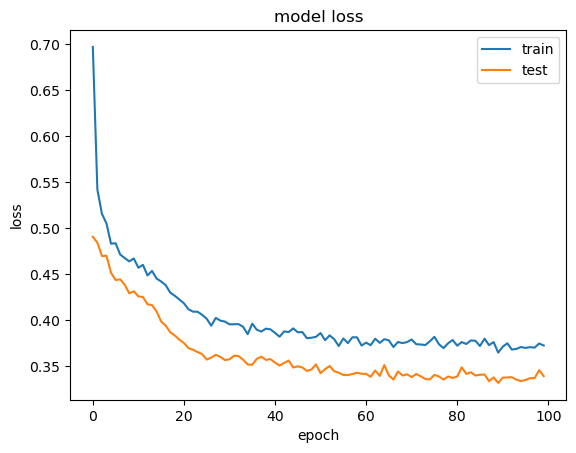

In [99]:
# Summrize the history for loss

plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper right")
plt.show()

#### Part 3 - Predictions and evaluating the model

In [94]:
# Predicting the result on test data

y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 1ms/step


In [95]:
# making the confusion matrix 

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [96]:
cm

array([[1602,   15],
       [ 272,  111]])

In [97]:
# calculate the accuraccy 

from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)

In [98]:
score

0.8565